# Brightfield sample
The notebook is an example of illumination calculation and correction on a sample of images.

### Importing the package

In [1]:
from matplotlib import pyplot as plt
import pybasic

### Reading the input images

In [2]:
wsi_path = 'Demoexamples/Timelapse_brightfield/Uncorrected/'
brightfield_images = pybasic.tools.load_data(wsi_path, '.png', verbosity = True)

0 / 100
10 / 100
20 / 100
30 / 100
40 / 100
50 / 100
60 / 100
70 / 100
80 / 100
90 / 100


## Run PyBaSiC background calculator

In [3]:
flatfield, darkfield = pybasic.basic(brightfield_images, darkfield=True)

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5


## Show output flatfield and darkfield components

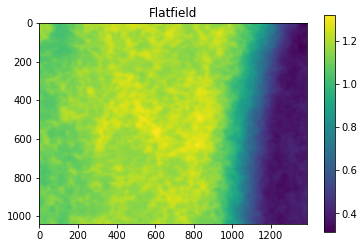

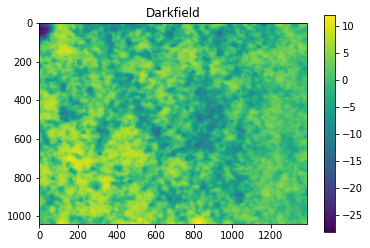

In [4]:
plt.title('Flatfield')
plt.imshow(flatfield)
plt.colorbar()
plt.show()
plt.title('Darkfield')
plt.imshow(darkfield)
plt.colorbar()
plt.show()

### Computing the Timelaps Drift

In [5]:
baseflour = pybasic.background_timelapse(
    images_list = brightfield_images, 
    flatfield = flatfield, 
    darkfield = darkfield
)

reweighting_iter: 1
reweighting_iter: 2
reweighting_iter: 3
reweighting_iter: 4
reweighting_iter: 5


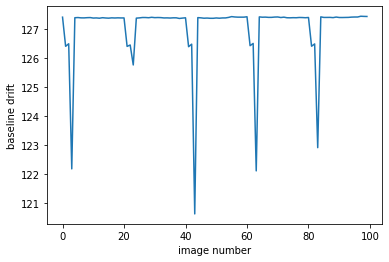

In [6]:
plt.plot(baseflour)
plt.ylabel("baseline drift")
plt.xlabel("image number")
plt.show()

### Applying Background Correction

In [7]:
brightfield_images_corrected = pybasic.correct_illumination(
    images_list = brightfield_images, 
    flatfield = flatfield, 
    darkfield = darkfield
)

### Comparison Between Corrected and Non-corrected Images

We explore the background correction for the 1st image (out of 100 total images).

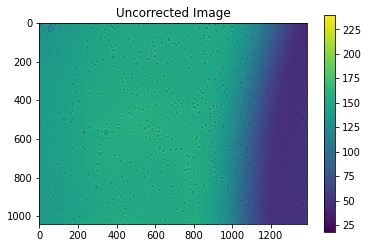

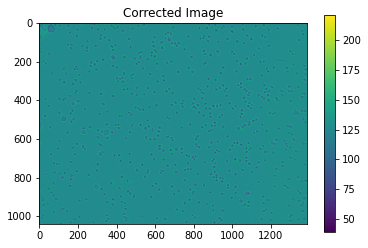

In [8]:
i = 1
plt.title('Uncorrected Image')
plt.imshow(brightfield_images[i])
plt.colorbar()
plt.show()
plt.title('Corrected Image')
plt.imshow(brightfield_images_corrected[i])
plt.colorbar()
plt.show()